## Paper theory

Difference image:

\begin{equation*}
D^j = I^j - I^{j-1}
\end{equation*}

Decomposed image set reconstruction:

\begin{equation*}
I = \sum_{j=1}^m D^j + I^m
\end{equation*}

Enhanced output image is generated via:

\begin{equation*}
I^{Result} = I^{Detail} + β ⋅ I^{Base},   0 < β \le 1
\end{equation*}


## Cheatsheet

```
array[volume, row, column, channel]
np.stack(self.decomposed_image_set, axis=0)
np.concatenate((arr1, arr2), axis=0)
np.empty_like(array)
x = np.exp(np.log(x)) # natural log
arr = np.where(arr < value, arr ** 2, arr)
cv2.imread(path_to_image, color_enum | color_enum ...) 
# cv2.IMREAD_GRAYSCALE=0, cv2.IMREAD_COLOR=1, cv2.IMREAD_UNCHANGED=-1, cv2.IMREAD_ANYDEPTH, cv2.IMREAD_ANYCOLOR
cv2.imwrite(file_name, file, imwrite_flags)
```

* [OpenCV 3.4.2 docs](https://docs.opencv.org/3.4.2/)
* [math formulas in jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html)
* [YUV color space wiki page](https://en.wikipedia.org/wiki/YUV)


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage

from bilateral_fusion_MLIC import Bilateral_fusion_MLIC

In [2]:
path = "dataset/source/leaf/"
src1 = cv2.imread(path + "input-01.bmp", -1).astype(np.float32)
src2 = cv2.imread(path + "input-02.bmp", -1).astype(np.float32)
src3 = cv2.imread(path + "input-02.bmp", -1).astype(np.float32)
image_set = [src1, src2, src2]
src1.shape

(514, 1000, 3)

In [3]:
mlic_fusion = Bilateral_fusion_MLIC(image_set=image_set, kernel_size=3, scale_depth=5, alpha=None, beta=0.8)
result_image = mlic_fusion.fuse()

In [4]:
test = result_image.copy()
# test = np.where(np.isnan(test), 0, test)
# test = np.where(test <= 0, 0.0001, test)
test_reverse = np.exp(test)
cv2.imwrite("result_image.png", test_reverse)

True

* difference_set
* i_detail_d_set
* i_detail_u_set

In [23]:
np.min(result_image)

-21502.116156889624

In [46]:
# Save decomposed set
for idx, image in enumerate(mlic_fusion.decomposed_image_set):
    cv2.imwrite("dataset/debug/decomposed" + str(idx) + ".png", np.exp(image))

# Save difference set
for idx, image in enumerate(mlic_fusion.difference_set):
    cv2.imwrite("dataset/debug/difference" + str(idx) + ".png", np.exp(image))

# Save result image
cv2.imwrite("dataset/debug/result_image.png", result_image)

True

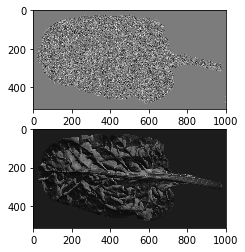

In [55]:
plt.figure()
plt.subplot(211)
plt.imshow(np.exp(lol), 'gray')
plt.subplot(212)
plt.imshow(np.exp(mlic_fusion.difference_set[4]), 'gray')